# 1. Importing Packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.callbacks import EarlyStopping, TensorBoard
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Loading Data

In [4]:
df = pd.read_csv("E:/Documents/Academic/Arshad/Thesis/Working Directory/Datasets/Tabular Data/MT10_scaled_lasso.csv")
df1 = pd.read_csv("E:/Documents/Academic/Arshad/Thesis/Working Directory/Datasets/Tabular Data/MT10.csv")

# 3. Data Exploaration

In [5]:
df.isna().sum()

COUNTY                          0
NAME                            0
lon                             0
lat                             0
POP_ESTIMATE_2019               0
                               ..
percent_fair_or_poor_health     0
percent_physically_inactive     0
percent_adults_with_diabetes    0
percent_insufficient_sleep      0
Mortality_Rate                  0
Length: 483, dtype: int64

In [6]:
df.columns.get_loc("R_INTERNATIONAL_MIG_2018")

466

In [7]:
df = df.iloc[:,466:]

In [8]:
df.head()

,R_INTERNATIONAL_MIG_2018,Median_Household_Income_2018,Density_per_square_mile_of_land_area_Population,Active_Physicians_per_100000_Population_2018_AAMC,Total_nurse_practitioners_2019,Mean_Annual_Precipitation,Annual_Mean_Range_Temp,Cardiovascular_diseases_Mortality_Rate_2014,Hypertensive_heart_disease_Mortality_Rate_2014,Leukemia_Mortality_Rate_2014,Chronic_respiratory_diseases_Mortality_Rate_2014,Asthma_Mortality_Rate_2014,percent_fair_or_poor_health,percent_physically_inactive,percent_adults_with_diabetes,percent_insufficient_sleep,Mortality_Rate
0,-0.493836,0.473687,-0.095624,-0.9176,-0.153843,0.200268,0.795795,0.653028,-0.008285,0.655147,1.066666,-0.476512,0.624812,1.284879,-0.252219,0.692690,191.519447
1,-0.273426,0.347347,-0.082354,-0.9176,0.393965,0.691463,-0.154841,-0.099986,0.104523,-0.344122,-0.566312,-0.808072,-0.089572,-0.155557,-0.350800,0.066570,136.627933
2,-0.273426,-1.327983,-0.131010,-0.9176,-0.257455,0.012676,0.375264,-0.387973,0.030172,0.894102,0.356133,0.951746,2.468828,-0.682545,1.349726,1.332833,226.849226
3,-0.317508,-0.484615,-0.127635,-0.9176,-0.265822,0.495849,0.561838,1.701845,0.339112,1.437183,1.226936,0.135599,0.319214,1.074083,0.585721,1.233045,276.859873
4,-0.449754,-0.170716,-0.097311,-0.9176,-0.146292,1.246217,-0.465797,0.509289,-0.519766,0.655147,1.378896,-0.425503,0.807398,0.511962,1.201854,0.702229,231.729672


In [9]:
df.columns

Index(['R_INTERNATIONAL_MIG_2018', 'Median_Household_Income_2018',
       'Density_per_square_mile_of_land_area_Population',
       'Active_Physicians_per_100000_Population_2018_AAMC',
       'Total_nurse_practitioners_2019', 'Mean_Annual_Precipitation',
       'Annual_Mean_Range_Temp', 'Cardiovascular_diseases_Mortality_Rate_2014',
       'Hypertensive_heart_disease_Mortality_Rate_2014',
       'Leukemia_Mortality_Rate_2014',
       'Chronic_respiratory_diseases_Mortality_Rate_2014',
       'Asthma_Mortality_Rate_2014', 'percent_fair_or_poor_health',
       'percent_physically_inactive', 'percent_adults_with_diabetes',
       'percent_insufficient_sleep', 'Mortality_Rate'],
      dtype='object')

## 3.1 Summary Statistics

In [10]:
pd.options.display.float_format = '{:.3f}'.format  # Suppressing scientific notation to be 3 digits
df1[['R_INTERNATIONAL_MIG_2018', 'Median_Household_Income_2018',
       'Density_per_square_mile_of_land_area_Population',
       'Active_Physicians_per_100000_Population_2018_AAMC',
       'Total_nurse_practitioners_2019', 'Mean_Annual_Precipitation',
       'Annual_Mean_Range_Temp', 'Cardiovascular_diseases_Mortality_Rate_2014',
       'Hypertensive_heart_disease_Mortality_Rate_2014',
       'Leukemia_Mortality_Rate_2014',
       'Chronic_respiratory_diseases_Mortality_Rate_2014',
       'Asthma_Mortality_Rate_2014', 'percent_fair_or_poor_health',
       'percent_smokers', 'percent_physically_inactive',
       'percent_adults_with_diabetes', 'percent_insufficient_sleep',
       'Mortality_Rate']].describe()

,R_INTERNATIONAL_MIG_2018,Median_Household_Income_2018,Density_per_square_mile_of_land_area_Population,Active_Physicians_per_100000_Population_2018_AAMC,Total_nurse_practitioners_2019,Mean_Annual_Precipitation,Annual_Mean_Range_Temp,Cardiovascular_diseases_Mortality_Rate_2014,Hypertensive_heart_disease_Mortality_Rate_2014,Leukemia_Mortality_Rate_2014,Chronic_respiratory_diseases_Mortality_Rate_2014,Asthma_Mortality_Rate_2014,percent_fair_or_poor_health,percent_smokers,percent_physically_inactive,percent_adults_with_diabetes,percent_insufficient_sleep,Mortality_Rate
count,3140.000,3139.000,3140.000,3140.000,3140.000,3134.000,3134.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000
mean,1.123,52807.538,259.281,254.935,52.696,3.699,21.455,277.804,10.183,9.532,63.750,1.258,17.926,17.455,27.368,12.118,33.040,195.014
std,2.268,13874.788,1724.944,42.293,153.879,1.351,2.816,58.865,7.806,0.925,16.895,0.392,4.724,3.568,5.699,4.055,4.157,113.372
min,-3.900,25385.000,0.000,191.300,0.026,0.313,7.608,76.980,1.640,4.170,14.270,0.490,8.121,5.909,9.500,1.800,23.028,0.000
25%,0.000,43692.000,16.975,227.600,5.439,2.916,19.617,234.947,5.760,9.020,52.138,1.020,14.320,14.939,23.500,9.200,30.019,115.826
50%,0.400,50576.000,45.200,247.100,13.077,3.832,21.192,271.720,8.170,9.600,62.365,1.170,17.211,16.951,27.200,11.600,32.945,180.401
75%,1.300,58851.500,113.725,278.800,35.216,4.521,22.756,315.650,12.000,10.120,73.352,1.410,20.922,19.714,31.100,14.500,36.110,255.464
max,38.800,140382.000,69468.400,847.000,3937.768,13.540,32.700,545.230,113.820,16.550,160.970,4.120,40.991,41.491,49.900,34.100,46.708,865.801


## 3.2 Heatmap of Pair-wise Correlation

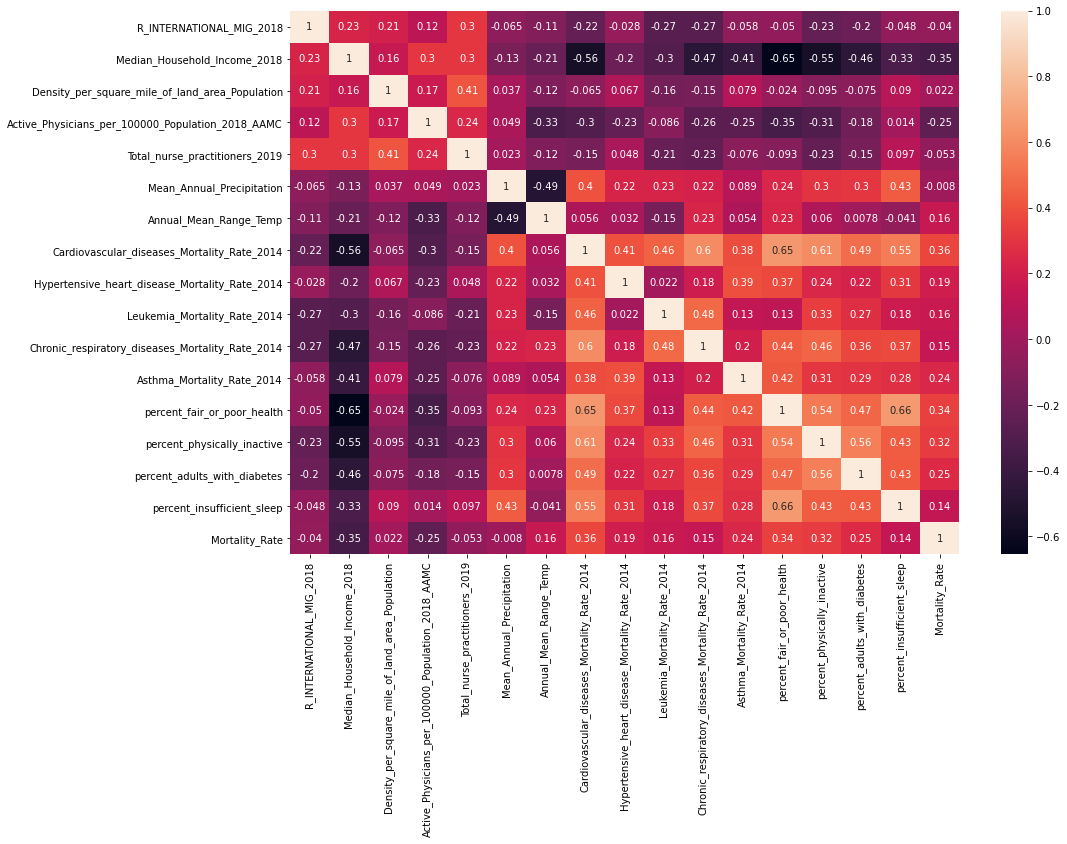

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
sns.heatmap(df.corr(), annot=True);  # Pair-wise correlation heatmap

## 3.3 Defining Training Features & Labels

In [12]:
train_features = df.iloc[:,:-1]
train_labels = df.iloc[:,df.columns.get_loc("Mortality_Rate")]

# 4. Deep Learning Model

In [16]:
# Clearing model session
K.clear_session()

# Defining a custom loss function
# def RMSE(y_true, y_pred):
#     return tf.sqrt(tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_true, y_pred),2.0)),tf.cast(tf.size(y_true), tf.float32)))

# Specifying time to change the name of the model and further filter out them on tensorboard
# Name = 'COVID-19_Mortality_Neural_Network-{}'.format(int(time.time()))

# Defining a callback for early stopping on validation loss and one for Tensorboard
EarlyStopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='min')
# Tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

def build_model(hp):
    # Creating model
    model = Sequential()
    # The initial wights are random numbers between 0 and 1, uniformly distributed.
    model.add(Dense(
                    units = hp.Int('input_units', min_value=8, max_value=32, step=2),
                    activation = hp.Choice('act_inp', ['relu','tanh','sigmoid']),
                    input_dim=16, kernel_initializer='uniform'))

    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(
                        units = hp.Int('middle_dense_unit_' + str(i), min_value=8, max_value=16, step=2),
                        activation = hp.Choice('act_inp', ['relu','tanh','sigmoid'])))

    model.add(BatchNormalization())

    model.add(Dense(
                    units = hp.Int('last_dense_unit', min_value=4, max_value=8, step=2),
                    activation = hp.Choice('act_inp', ['relu','tanh','sigmoid'])))

    model.add(BatchNormalization())
    model.add(Dense(1))
    
    # Compiling model
    model.compile(Adam(hp.Choice('learning_rate',
                       values=[1e-3, 2e-3])),
                       loss='mean_squared_error')
    
    return model

tuner = RandomSearch(build_model,
                     objective='val_loss',
                     max_trials=20,  # how many model variations to test?
                     executions_per_trial=1,  # how many trials per variation? (same model could perform differently)
                     directory='my_dir01') 

tuner.search_space_summary()

# Plotting graph
# plot_model(build_model, to_file='Feed Forward Neural Network.png', show_shapes=True, rankdir='TB')

Search space summary
Default search space size: 6
input_units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 2, 'sampling': None}
act_inp (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
middle_dense_unit_0 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 16, 'step': 2, 'sampling': None}
last_dense_unit (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 8, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.002], 'ordered': True}


In [18]:
# Craeting a learning rate schedule
# lr_schedule = ExponentialDecay(initial_learning_rate=0.01, decay_steps=3133/32, decay_rate=0.96)
# optimizer = Adam(learning_rate=lr_schedule)
# model.compile(loss=RMSE, optimizer=optimizer)  # Training With custom loss function

tuner.search(train_features, train_labels, epochs=200, validation_split=0.2, callbacks=[EarlyStopper])

Trial 20 Complete [00h 01m 05s]
val_loss: 11533.232421875

Best val_loss So Far: 9919.439453125
Total elapsed time: 00h 11m 19s
INFO:tensorflow:Oracle triggered exit


In [19]:
print(tuner.get_best_models()[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                476       
_________________________________________________________________
batch_normalization (BatchNo (None, 28)                112       
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                406       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 90        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 2

In [20]:
tuner.results_summary()

Results summary
Results in my_dir01\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_units: 28
act_inp: sigmoid
num_layers: 1
middle_dense_unit_0: 14
last_dense_unit: 6
learning_rate: 0.002
middle_dense_unit_1: 10
middle_dense_unit_2: 16
Score: 9919.439453125
Trial summary
Hyperparameters:
input_units: 12
act_inp: sigmoid
num_layers: 1
middle_dense_unit_0: 10
last_dense_unit: 6
learning_rate: 0.001
middle_dense_unit_1: 10
Score: 10099.2216796875
Trial summary
Hyperparameters:
input_units: 26
act_inp: tanh
num_layers: 3
middle_dense_unit_0: 8
last_dense_unit: 4
learning_rate: 0.002
middle_dense_unit_1: 16
middle_dense_unit_2: 14
Score: 10388.6728515625
Trial summary
Hyperparameters:
input_units: 12
act_inp: relu
num_layers: 3
middle_dense_unit_0: 10
last_dense_unit: 8
learning_rate: 0.001
middle_dense_unit_1: 10
middle_dense_unit_2: 8
Score: 10509.5068359375
Trial summary
Hyperparameters:
input_units: 10
act_inp: relu
num_layers: 1
middle_dense_unit_0: 10
las

In [32]:
# Clearing model session
K.clear_session()

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_features, train_labels, epochs=200, validation_split=0.2, callbacks=[EarlyStopper])

Epoch 1/200
79/79 [==============================] - 0s 5ms/step - loss: 50818.2695 - val_loss: 49875.5898
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 50226.6719 - val_loss: 49370.0859
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 49363.3438 - val_loss: 48548.2578
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 48192.9180 - val_loss: 47370.2344
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 46758.6836 - val_loss: 45786.2344
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 45088.9375 - val_loss: 44029.5039
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 43189.0703 - val_loss: 42511.3242
Epoch 8/200
79/79 [==============================] - 0s 3ms/step - loss: 41180.6914 - val_loss: 41323.3516
Epoch 9/200
79/79 [==============================] - 0s 4ms/step - loss: 39039.0273 - val_loss: 40915.7461
Epoch 10/200
79/79 [=================

In [33]:
pred = model.predict(train_features)

In [34]:
pred[0:10]  # First 10 predictions

array([[182.10364],
       [173.67892],
       [233.46146],
       [267.91382],
       [174.6059 ],
       [336.8417 ],
       [294.74536],
       [233.0144 ],
       [283.7934 ],
       [185.81137]], dtype=float32)

## 4.1 Loss Displaying

In [35]:
from matplotlib.pyplot import figure

def plot_loss(history):
  figure(figsize=(9, 5))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend(fontsize='small')

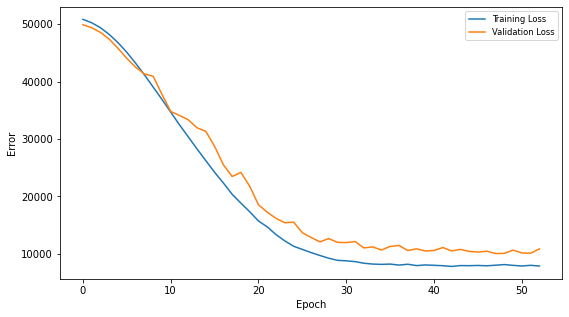

In [36]:
plot_loss(history)

## 4.2 Model Evaluation

In [37]:
print("Mean Absolute Error (MAE):", np.round(mean_absolute_error(df['Mortality_Rate'], pred),3),
      "\nMean Squared Error (MSE):", np.round(mean_squared_error(df['Mortality_Rate'], pred),3),
      "\nRoot Mean Squared Error (RMSE):", np.round(np.sqrt(mean_squared_error(df['Mortality_Rate'], pred)),3),
      "\nR-Squared:", np.round(r2_score(df['Mortality_Rate'], pred),3))

Mean Absolute Error (MAE): 63.506 
Mean Squared Error (MSE): 7822.191 
Root Mean Squared Error (RMSE): 88.443 
R-Squared: 0.39


In [38]:
# Coefficients
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(16, 28) dtype=float32, numpy=
array([[-6.59858286e-02, -1.23621747e-02, -9.64050763e-04,
        -5.57033569e-02, -1.10423537e-02,  5.56082912e-02,
         1.56455077e-02,  2.59451568e-01,  3.07174064e-02,
        -1.38154879e-01,  9.30006057e-02, -3.71868983e-02,
         1.02781896e-02, -1.22359090e-01, -1.19478367e-01,
        -7.72149488e-02, -9.02616605e-02, -5.91855757e-02,
        -7.91411940e-03,  8.33306313e-02, -1.62248075e-01,
        -1.60514504e-01,  4.22826745e-02, -3.37958075e-02,
         6.66933581e-02, -1.13762699e-01, -6.84324801e-02,
        -2.67471522e-01],
       [ 1.41126225e-02, -2.42457673e-01, -1.99328307e-02,
         2.69164234e-01, -1.08357228e-01,  1.28857478e-01,
        -1.58248022e-01, -1.15125217e-01, -1.78531051e-01,
         5.80701381e-02, -2.70017505e-01,  4.32128429e-01,
        -8.39758292e-02,  1.52687907e-01,  3.21439117e-01,
         2.14073598e-01,  3.38846982e-01, -8.99380967e-02,
         6.53858110e-0

In [39]:
# Intercepts
model.layers[0].weights[1]

<tf.Variable 'dense/bias:0' shape=(28,) dtype=float32, numpy=
array([ 0.7126341 , -1.094595  , -0.07223268,  0.32481185,  0.26440933,
        0.33405304, -0.9439744 , -0.36123326, -0.88489175, -0.13442138,
       -1.3143249 ,  1.6958461 ,  0.74815744,  0.7482917 ,  0.20948045,
        0.9283484 ,  1.1990654 , -0.27325335,  0.08491072, -0.49970415,
        1.605947  ,  0.13785097,  0.10550086,  0.4708334 , -0.30641493,
        0.44873306, -0.8778008 , -0.3733604 ], dtype=float32)>

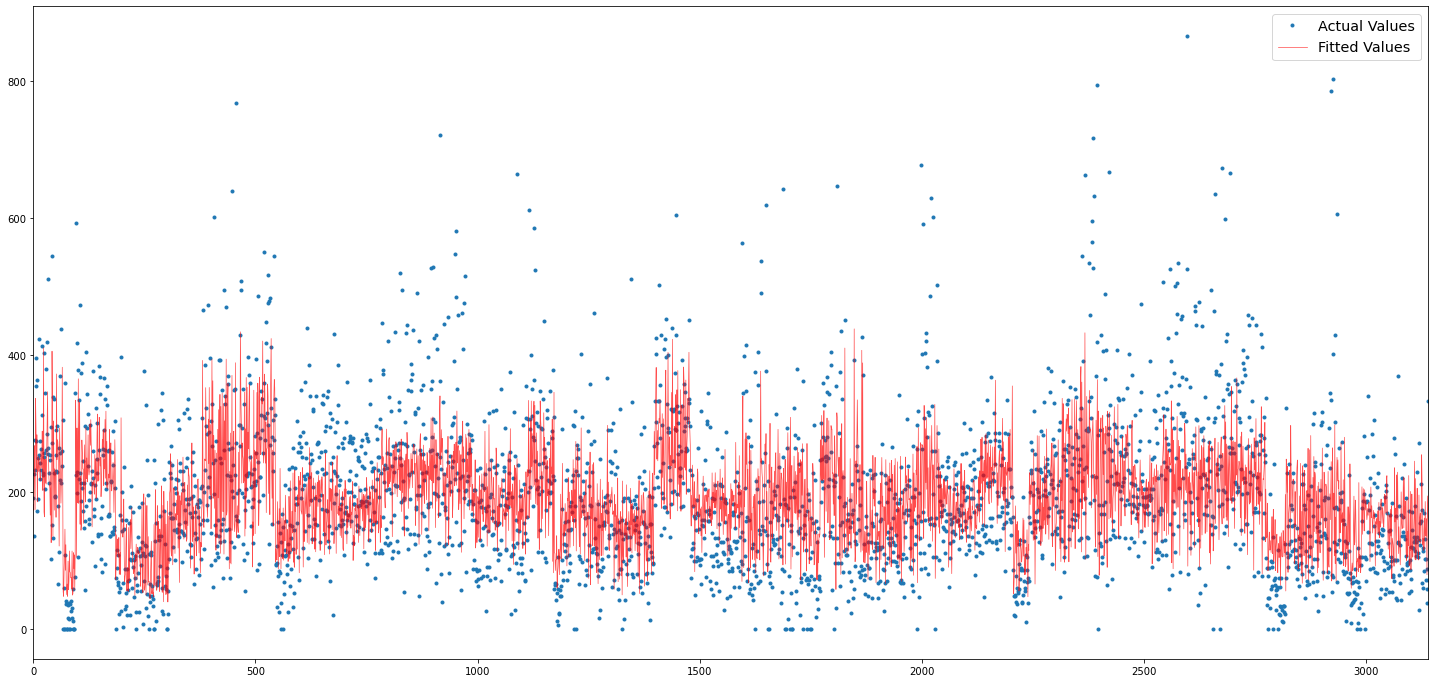

In [40]:
x=np.linspace(0,3140,3133)
figure(figsize=(25, 12))
plt.autoscale(enable=True, axis='x', tight=True)
plt.plot(x,train_labels,'.')
plt.plot(x,pred,'r', lw=0.7, alpha=0.7)
plt.legend(['Actual Values','Fitted Values'], fontsize='x-large');

# 5. Saving Model

In [41]:
model.save('Feed_Forward_Neural_Network.h5')

# 6. Loading Model

In [42]:
from keras.models import load_model

In [43]:
new_model = load_model('Feed_Forward_Neural_Network.h5')

In [44]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                476       
_________________________________________________________________
batch_normalization (BatchNo (None, 28)                112       
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 14)                406       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 90        
_________________________________________________________________
batch_normalization_2 (Batch (None, 6)                 2